# binary classification

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn import metrics

Read Data

In [29]:
stroke_path = r"D:\BCAI_4\D_L\SEC\Sec_1\1- Neural Network\Task\stroke.csv"
try:
    df_stroke = pd.read_csv(stroke_path)
    print("stroke.csv file uploaded active.")
except FileNotFoundError:
    print(f"Error: File not found at specified path: {stroke_path}")
    exit()

stroke.csv file uploaded active.


PreProcessing

In [30]:
df_stroke = df_stroke.drop('id', axis=1, errors='ignore') 
X = df_stroke.drop('stroke', axis=1)
y = df_stroke['stroke']

In [31]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [32]:
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)])


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [34]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

Build Model

In [35]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_processed.shape[1]]),
    layers.Dropout(0.3), 
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(16, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(8, activation='relu'),

    layers.Dense(1, activation='sigmoid') 
])

In [36]:
model.compile(optimizer='adam',
              loss='binary_crossentropy', 
              metrics=['accuracy'])

Train

In [37]:
history=model.fit(
    X_train_processed, y_train,
    validation_split=0.2,
    epochs=150,
    batch_size=32,
)

Epoch 1/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7240 - loss: 0.5422 - val_accuracy: 0.7995 - val_loss: 0.4535
Epoch 2/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7959 - loss: 0.4569 - val_accuracy: 0.8123 - val_loss: 0.4284
Epoch 3/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8063 - loss: 0.4338 - val_accuracy: 0.8239 - val_loss: 0.4097
Epoch 4/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8150 - loss: 0.4090 - val_accuracy: 0.8290 - val_loss: 0.3898
Epoch 5/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8195 - loss: 0.4048 - val_accuracy: 0.8310 - val_loss: 0.3750
Epoch 6/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8245 - loss: 0.3882 - val_accuracy: 0.8342 - val_loss: 0.3664
Epoch 7/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8245 - loss: 0.3777 - val_accuracy: 0.8496 - val_loss: 0.3502
Epoch 8/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8335 - loss: 0.3697 - val_accu

In [39]:
history.history

{'accuracy': [0.7239993810653687,
  0.795852780342102,
  0.8063012361526489,
  0.8149815201759338,
  0.8194823861122131,
  0.8244655132293701,
  0.8244655132293701,
  0.8334673047065735,
  0.8355569839477539,
  0.8468092083930969,
  0.8453624844551086,
  0.8501848578453064,
  0.8572576642036438,
  0.8593473434448242,
  0.8652949929237366,
  0.8595080971717834,
  0.8628838062286377,
  0.8714033365249634,
  0.8739752173423767,
  0.8778331279754639,
  0.876707911491394,
  0.8850666880607605,
  0.8810480833053589,
  0.8911750316619873,
  0.8882816433906555,
  0.8927825093269348,
  0.8943899869918823,
  0.8943899869918823,
  0.8945507407188416,
  0.893425464630127,
  0.8995338082313538,
  0.8985693454742432,
  0.9019450545310974,
  0.9074103832244873,
  0.9022665023803711,
  0.901623547077179,
  0.9090178608894348,
  0.9107860326766968,
  0.9082140922546387,
  0.9074103832244873,
  0.9130364656448364,
  0.9148046970367432,
  0.9088571071624756,
  0.9117504954338074,
  0.9125542640686035,
  

Accurcy

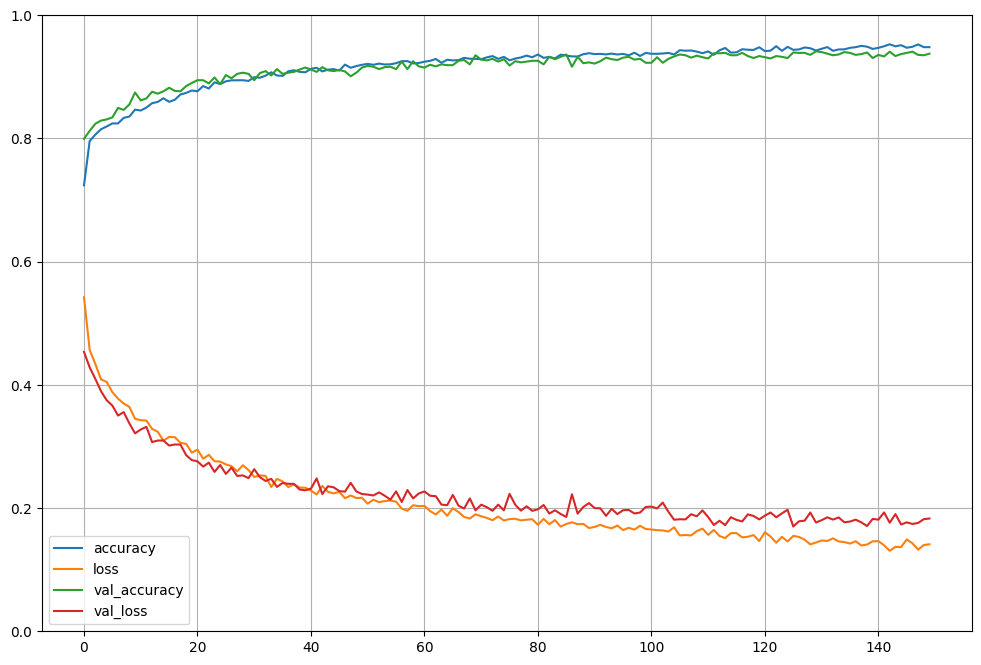

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6694 - loss: 0.7033
Loss     :  0.7032961249351501
accuracy :  0.6694087386131287


In [40]:
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Evaluate the model
model_evaluate = model.evaluate(X_test, y_test)
print("Loss     : ",model_evaluate[0])
print("accuracy : ",model_evaluate[1])

In [41]:
model.predict(X_test)

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.90935576],
       [0.7319195 ],
       [0.54733115],
       ...,
       [0.34982276],
       [0.9175498 ],
       [0.0199533 ]], shape=(1945, 1), dtype=float32)

In [42]:
y_pred = (model.predict(X_test) > 0.5).astype("int32").tolist()

y_pred

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[[1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1]

In [44]:
y_pred_probs = model.predict(X_test_processed)
y_pred = (y_pred_probs > 0.5).astype("int32") 
print("\nClassification Report:\n", classification_report(y_test, y_pred))

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92       973
           1       0.89      0.98      0.93       972

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.93      0.93      0.93      1945

